In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Implement the position controller from Equation 2.11. Test your robot moving from an initial location [1, 2] to a desired location [3, 3].

In [2]:
# Perfect sensor
def sense(x):
    return x

In [3]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [4]:
def control(t, y):    
 ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
  k = 1
  ux = k * (3 - y[0])
  uy = k * (3 - y[1])
  return np.array([ux, uy])

In [5]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([1., 2.]) # initial point
x_log = [copy(x)]

for t in time:    
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

    
x_log = array(x_log)

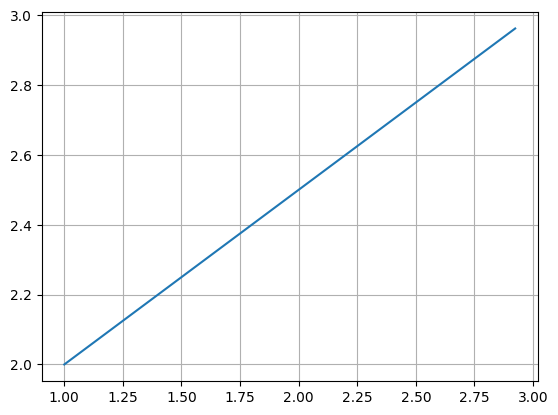

In [6]:
grid()
plot(x_log[:,0], x_log[:,1])


# axes().set_ylabel("Time z")

Write a control policy that uses the position controller to make the robot move to different locations to approximate the path of the following figure:

In [7]:
def control2(t, y, targets, target_index, k):    
  # Check if the robot has reached the current target
  if np.linalg.norm(targets[target_index] - y) < 0.1:
    if target_index < len(targets) - 1:
        target_index += 1
        
  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
  ux = k * (targets[target_index][0] - y[0])
  uy = k * (targets[target_index][1] - y[1])
    
  return np.array([ux, uy]), target_index

In [8]:
tf = 20
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initialize targets and control policy parameter
targets = np.array([[-2.5, 2.5], [3, -2.5], [3, 3], [0, 0]])
k = 1  
target_index = 0  

# Initial conditions
x = array([-3., -3.]) # initial point
x_log = [copy(x)]

for t in time:    
    y = sense(x)
    u, target_index = control2(t, y, targets, target_index, k)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

    
x_log = array(x_log)

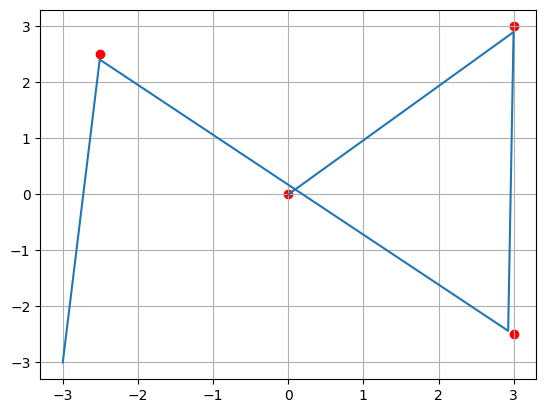

In [9]:
grid()
plot(x_log[:,0], x_log[:,1])
plt.scatter(targets[:, 0], targets[:, 1], color='red', label='Targets')

# axes().set_ylabel("Time z")

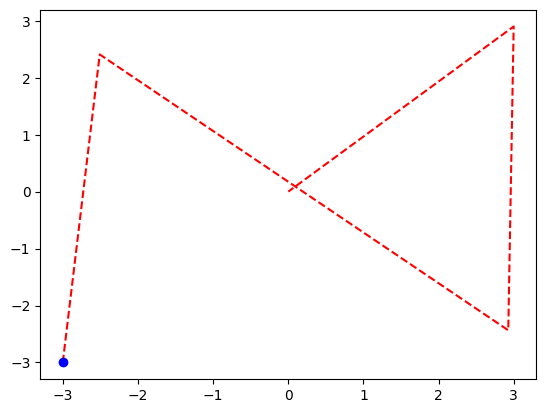

In [10]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

Part 2: Learning to fly

Write a simulator that includes translational dynamics to simulate free fall (Section 3.3 of the book). Use this code as a guideline.

In [11]:
def fly_simulate(Δt, x, u, m=1, g=9.8):
    # Control input affects the acceleration
    dx = array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])
    
    # Include the gravity in the acceleration in z
    dx[5] += - g
        
    # Euler integration
    x += Δt * dx
    
    # Simulate the floor (Plastic collision)    
    if x[2] < 0:        
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0
    
    return x

In [12]:
def fly_control(t, y):    
    ux = 0
    uy = 0
    uz = 0  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]

In [13]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10., 0.,0.,0.])
x_log = [copy(x)]

for t in time:    
    y = sense(x)
    u = fly_control(t, y)
    x = fly_simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

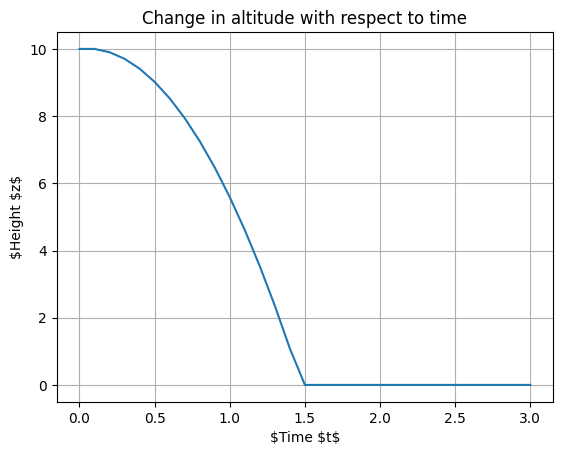

In [14]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()


# axes().set_ylabel("Time z")

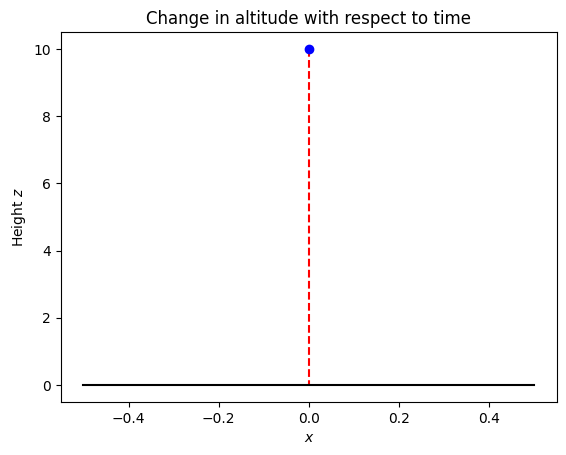

In [15]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
    
    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')
    
    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

Include a buoyancy force of fb=9.0 in the simulator. How does it compare with the free fall? Which one falls faster?  (Exercise 1 of Chapter 3).

In [16]:
def fly_simulate_buoyancy(Δt, x, u, m=1, g=9.8, fb = 9.0):
    # Control input affects the acceleration
    dx = array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])
    
    # Include the gravity in the acceleration in z
    dx[5] += - g + fb/m
        
    # Euler integration
    x += Δt * dx
    
    # Simulate the floor (Plastic collision)    
    if x[2] < 0:        
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0
    
    return x

In [17]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10., 0.,0.,0.])
x_log = [copy(x)]

for t in time:    
    y = sense(x)
    u = fly_control(t, y)
    x = fly_simulate_buoyancy(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

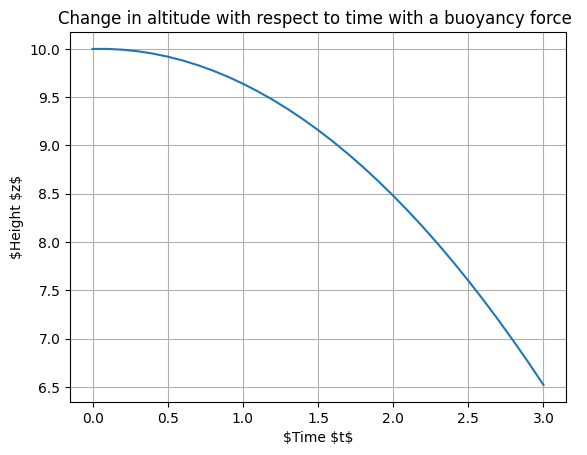

In [18]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time with a buoyancy force ", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()

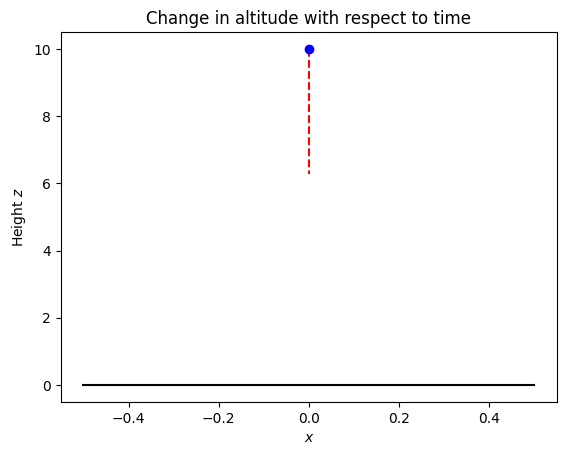

In [19]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
    
    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')
    
    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

Write a height controller that compensates for gravity using a PD controller (Exercise 2 of Chapter 3).
Solve Excercise 3 of Chapter 3

Given a desired height zd = 15, implement in the simulation a control policy (see Equation (3.8)) that drives the robot from an initial location p = [0, 0, 10]⊤ to the desired location pd = [0, 0, zd]⊤.


In [39]:
def new_fly_control(t, y):    
    zd = 15
    z = y[2]
    z_dot = y[5]
    kp=1.5
    m=1 
    g=9.8
    z_dot_d = 0
    kd = 2
    
    ux = 0
    uy = 0
    uz = kp * (zd - z) + kd * (z_dot_d - z_dot) + m * g ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]

In [40]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10., 0.,0.,0.])
x_log = [copy(x)]

for t in time:    
    y = sense(x)
    u = new_fly_control(t, y)
    x = fly_simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

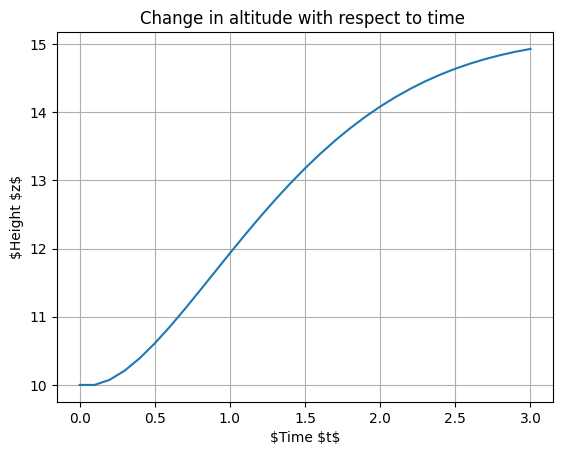

In [41]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time ", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()

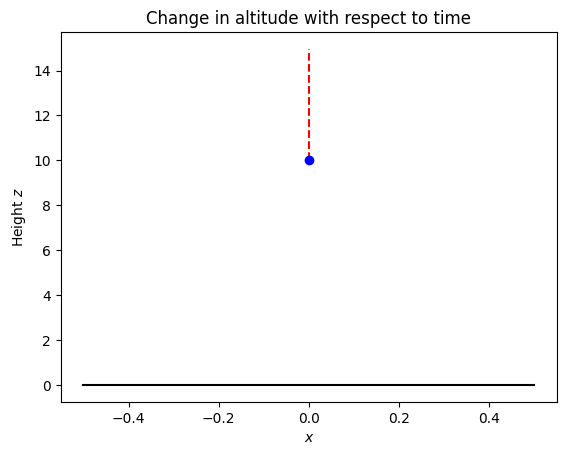

In [42]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
    
    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')
    
    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

Solve the previous exercise but now, your controller considers a mass m = 1. However, the actual mass is m = 0.8. How can the robot compensate for the unknown value of the mass? Can the robot maintain the desired altitude?

In [87]:
def new_fly_control2(t, y):    
    zd = 15
    z = y[2]
    z_dot = y[5]
    kp=1.5
    m_estimated= 1
    g=9.8
    kd = 3.6
    ez = zd - z
    dt = 0.1
    ki = 0.1
    if not hasattr(new_fly_control2, "pid_integral"):
        new_fly_control2.pid_integral = 0.0
        
    new_fly_control2.pid_integral += ez * dt
     
    ux = 0
    uy = 0
    uz =  kp * (ez + (kd * (-z_dot)) + (ki * new_fly_control2.pid_integral) + (m_estimated *g))
    return [ux, uy, uz]

In [88]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10., 0.,0.,0.])
x_log = [copy(x)]

for t in time:    
    y = sense(x)
    u = new_fly_control2(t, y)
    x = fly_simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

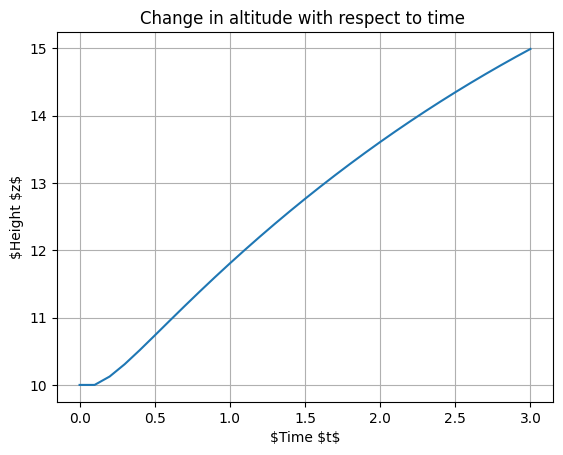

In [89]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time ", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()

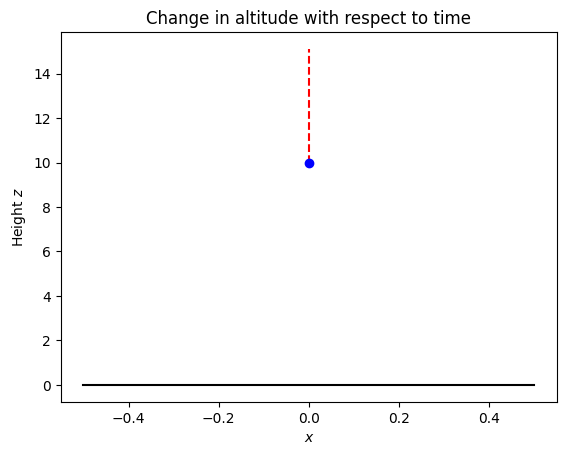

In [90]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
    
    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')
    
    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())